In [9]:
import pandas as pd

gold_data = pd.read_csv('GOLD.csv')
gold_data

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318
...,...,...,...,...,...,...,...,...,...
507,"Apr 26, 2019",31868,31851,31934,31705,9.67K,0.08%,NaN,247.177322
508,"Apr 30, 2019",31625,31800,31824,31597,6.44K,-0.76%,NaN,52.201158
509,"May 01, 2019",31563,31604,31657,31503,1.55K,-0.20%,NaN,113.293305
510,"May 02, 2019",31203,31420,31425,31160,0.48K,-1.14%,NaN,48.365693


In [10]:
gold_data.set_index('Date',inplace=True)
gold_data

,Price,Open,High,Low,Vol.,Change %,Pred,new
Date,,,,,,,,
"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318
...,...,...,...,...,...,...,...,...
"Apr 26, 2019",31868,31851,31934,31705,9.67K,0.08%,NaN,247.177322
"Apr 30, 2019",31625,31800,31824,31597,6.44K,-0.76%,NaN,52.201158
"May 01, 2019",31563,31604,31657,31503,1.55K,-0.20%,NaN,113.293305


In [11]:
gold_without_nan = gold_data.dropna()
gold_without_nan

,Price,Open,High,Low,Vol.,Change %,Pred,new
Date,,,,,,,,
"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318
...,...,...,...,...,...,...,...,...
"Dec 04, 2018",30964,30874,31085,30874,0.08K,0.57%,-31.0,301.615081
"Dec 05, 2018",30926,30830,30970,30825,0.04K,-0.12%,72.0,241.475101
"Dec 06, 2018",31005,31039,31196,30974,10.55K,0.26%,35.0,188.222186


Slope: [[-0.00823083]]
Intercept: [343.67028421]
Root mean squared error:  73300.46132887459
R2 score:  3.732507600850976e-05


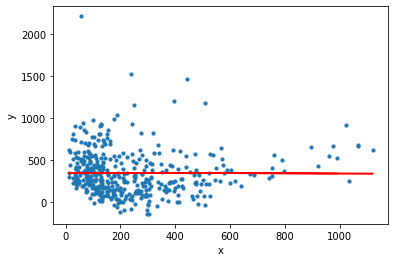

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


y = np.array(gold_without_nan["Pred"])
x = np.array(gold_without_nan["new"])
x = x.reshape(-1,1)
y = y.reshape(-1,1)


regression_model = LinearRegression()

regression_model.fit(x, y)

y_predicted = regression_model.predict(x)


rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)


print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)




plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')


plt.plot(x, y_predicted, color='r')
plt.show()

In [13]:
pre_data = gold_data[:]
pre_data_new = pre_data['new']
pre_data_new = pre_data_new.values.reshape(-1,1)
na_data = (regression_model.predict(pre_data_new))#getting predicted values
na_data_series = pd.Series(na_data.ravel())
sata = na_data_series.to_frame()
gold_data['Pred'] = sata
gold_data

,Price,Open,High,Low,Vol.,Change %,Pred,new
Date,,,,,,,,
"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,NaN,117.570740
"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,NaN,295.430176
"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,NaN,132.123714
"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,NaN,101.298064
"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,NaN,112.153318
...,...,...,...,...,...,...,...,...
"Apr 26, 2019",31868,31851,31934,31705,9.67K,0.08%,NaN,247.177322
"Apr 30, 2019",31625,31800,31824,31597,6.44K,-0.76%,NaN,52.201158
"May 01, 2019",31563,31604,31657,31503,1.55K,-0.20%,NaN,113.293305


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


y = np.array(gold_data["new"])
x = np.array(gold_data["Pred"])
x = x.reshape(-1,1)
y = y.reshape(-1,1)


regression_model = LinearRegression()
regression_model.fit(x, y)

y_predicted = regression_model.predict(x)


rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)


print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)


plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')


plt.plot(x, y_predicted, color='r')
plt.show()

ValueError: ignored

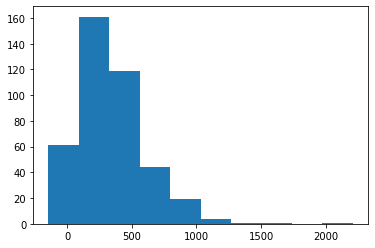

In [16]:
import matplotlib.pyplot as plt

plt.hist(gold_without_nan['Pred'])
plt.show()

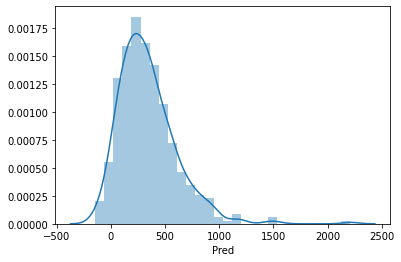

In [18]:
import seaborn as sns
sns.distplot(gold_without_nan['Pred'])
plt.show()

In [20]:
tcs_data = pd.read_csv('TCS.csv')
tcs_data['Date'] = pd.to_datetime(tcs_data['Date'])
tcs_data = tcs_data.sort_values('Date')
tcs_data.set_index('Date', inplace=True)
tcs_data

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,
2017-05-15,TCS,EQ,2360.65,2375.10,2377.95,2341.60,2368.00,2365.10,2352.60,908802,2.138043e+09,30047,712450,78.39
2017-05-16,TCS,EQ,2365.10,2380.00,2435.00,2373.45,2425.10,2429.15,2410.26,1800513,4.339703e+09,58476,1167534,64.84
2017-05-17,TCS,EQ,2429.15,2433.50,2460.75,2423.00,2450.00,2455.35,2443.31,1438099,3.513729e+09,86412,1031752,71.74
2017-05-18,TCS,EQ,2455.35,2450.00,2572.00,2442.25,2525.00,2536.20,2525.78,2569297,6.489478e+09,111566,1135613,44.20
2017-05-19,TCS,EQ,2536.20,2536.20,2540.55,2486.00,2503.85,2507.15,2506.58,893022,2.238430e+09,63112,517461,57.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-07,TCS,EQ,2157.85,2160.05,2184.35,2138.80,2154.00,2151.95,2163.53,2201698,4.763441e+09,86096,975603,44.31
2019-05-08,TCS,EQ,2151.95,2151.00,2168.00,2130.40,2156.00,2152.85,2151.85,1824895,3.926902e+09,77713,781526,42.83
2019-05-09,TCS,EQ,2152.85,2145.00,2184.10,2136.10,2171.20,2172.55,2166.98,2264162,4.906405e+09,106297,1251459,55.27


In [24]:
nifty_data = pd.read_csv('Nifty50.csv')
nifty_data['Date'] = pd.to_datetime(nifty_data['Date'])
nifty_data = nifty_data.sort_values('Date')
nifty_data.set_index('Date', inplace=True)
nifty_data

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
Date,,,,,,
2017-05-15,9433.55,9449.25,9423.10,9445.40,145163953,7790.97
2017-05-16,9461.00,9517.20,9456.35,9512.25,171709433,9209.89
2017-05-17,9517.60,9532.60,9486.10,9525.75,211856040,10726.23
2017-05-18,9453.20,9489.10,9418.10,9429.45,199340647,10782.46
2017-05-19,9469.90,9505.75,9390.75,9427.90,259861396,11544.77
...,...,...,...,...,...,...
2019-05-07,11651.50,11657.05,11484.45,11497.90,337495624,16632.84
2019-05-08,11478.70,11479.10,11346.95,11359.45,372826025,17440.01
2019-05-09,11322.40,11357.60,11255.05,11301.80,373028059,17602.86


In [0]:
fil_tcs = tcs_data[405:]
fil_nifty = nifty_data[405:]

In [0]:
return_tcs = fil_tcs['Close Price'].pct_change()
return_nifty = fil_nifty['Close'].pct_change()

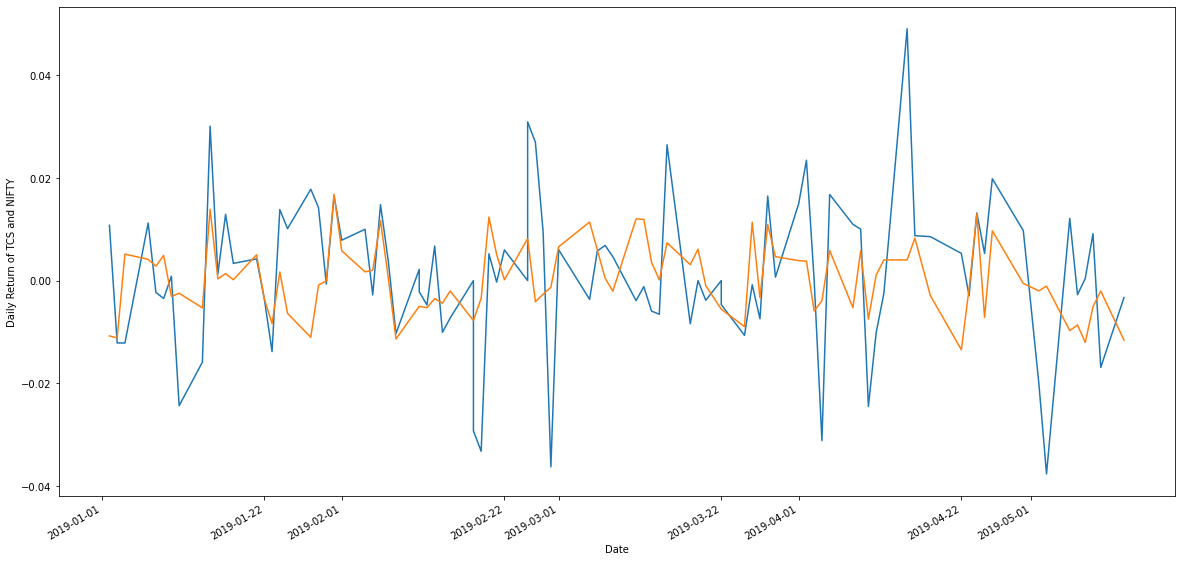

In [27]:
plt.figure(figsize=(20,10))
return_tcs.plot()
return_nifty.plot()
plt.ylabel("Daily Return of TCS and NIFTY")
plt.show()


In [31]:
fil_tcs['pct_change'] = fil_tcs['Close Price'].pct_change()
fil_nifty['pct_change'] = fil_nifty['Close'].pct_change()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [34]:
x = fil_tcs['pct_change'].dropna()
y = fil_nifty['pct_change'].dropna()
import pandas as pd 
import statsmodels.api as sm
myModel = sm.OLS(y,x).fit()
myModel.summary()


ValueError: ignored

In [40]:
import pandas as pd
import statsmodels.api as sm

tcs = pd.read_csv('TCS.csv', parse_dates=True, index_col='Date',)
nifty50 = pd.read_csv('Nifty50.csv', parse_dates=True, index_col='Date')

monthly_prices = pd.concat([tcs_data['Close'], nifty50_data['Close']], axis=1)
monthly_prices.columns = ['TCS', 'NIFTY50']


print(monthly_prices.head())


monthly_returns = monthly_prices.pct_change(1)
clean_monthly_returns = monthly_returns.dropna(axis=0)  
print(clean_monthly_returns.head())

KeyError: ignored

In [41]:
X = clean_monthly_returns['TCS']
y = clean_monthly_returns['NIFTY50']


X1 = sm.add_constant(X)

 
model = sm.OLS(y, X1)

results = model.fit()
print(results.summary())

NameError: ignored